<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [19]:
import numpy as np # numpy
import pandas as pd #pandas
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression #liner regresyon modelleri
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error # hata metrikleri
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate # test-train-split

from sklearn import model_selection 
import matplotlib.pyplot as plt #visula
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV #linerr cv modelleri

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Data Analysis
import numpy as np
import pandas as pd
import random

# Statistics
from scipy.stats import norm
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# ML
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xg

# Another
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [150]:
df=pd.read_csv("car_dataset.csv")
pd.set_option("display.max_columns", None)

In [16]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
83,innova,2015,12.50,13.460,38000,Diesel,Dealer,Manual,0
75,etios g,2015,3.95,6.800,36000,Petrol,Dealer,Manual,0
61,etios cross,2015,4.50,7.700,40588,Petrol,Dealer,Manual,0
168,Honda CB Trigger,2013,0.42,0.730,12000,Petrol,Individual,Manual,0
201,i20,2010,3.25,6.790,58000,Diesel,Dealer,Manual,1
266,amaze,2014,3.65,7.000,35000,Petrol,Dealer,Manual,0
148,Bajaj Pulsar 220 F,2010,0.52,0.940,45000,Petrol,Individual,Manual,0
192,Hero Hunk,2007,0.20,0.750,49000,Petrol,Individual,Manual,1
146,Hero Extreme,2014,0.55,0.787,15000,Petrol,Individual,Manual,0
253,city,2014,7.20,9.900,48000,Diesel,Dealer,Manual,0


In [29]:
df.shape

(301, 9)

In [30]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
print('Number of numerical features: ', end='')
print(len(df.select_dtypes(include=['number']).columns.values))
df.describe(exclude=['O'])

Number of numerical features: 5


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [23]:
print('Number of categorical features: ', end='')
print(len(df.select_dtypes(include=['O']).columns.values))
df.describe(include=['O'])

Number of categorical features: 4


,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


# Data Preparation

Exploratory Data Analysis (EDA)¶

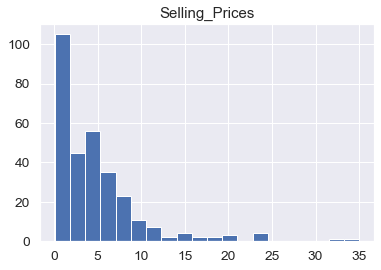

In [35]:
plt.hist(df['Selling_Price'], bins=20)
plt.title('Selling_Prices')
plt.show()

In [26]:
# First let's create the important data we will use
numerical_data = df.select_dtypes(include=['number'])
categorical_data = df.select_dtypes(include=['object'])

['Year' 'Selling_Price' 'Present_Price' 'Kms_Driven' 'Owner']
5


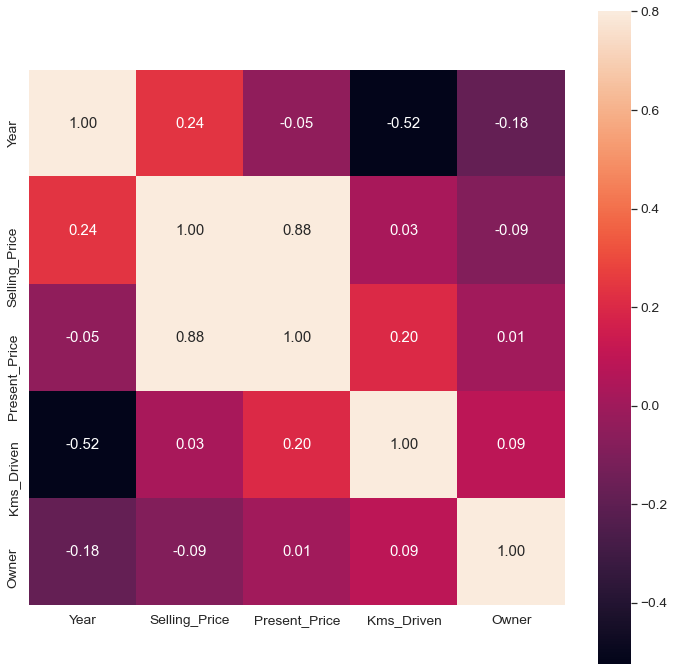

In [36]:
print(numerical_data.columns.values)
print(len(numerical_data.columns.values))

corrmat = numerical_data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, annot_kws={'size': 15}, fmt='.2f')
plt.show()

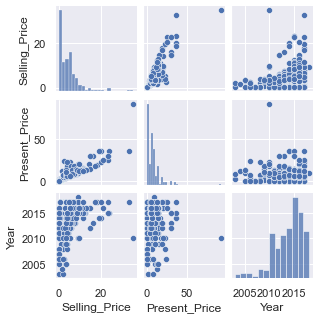

Index(['Selling_Price', 'Present_Price', 'Year'], dtype='object')


In [39]:
sns.set()
most_largest_features = corrmat.nlargest(3, 'Selling_Price')['Selling_Price'].index
sns.pairplot(numerical_data[most_largest_features.values], size=1.5)
plt.show()
print(most_largest_features)

Nutral Features : features have a relationship with 'SalePrice' in this range [-0.1, 0.2]

In [40]:
corr_with_price = numerical_data.corr()
corr_with_price = corr_with_price.sort_values(by= 'Selling_Price', ascending=False)
corr_with_price['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

Dealing with Kategorical Data

In [41]:
categorical_data 

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
5,vitara brezza,Diesel,Dealer,Manual
6,ciaz,Petrol,Dealer,Manual
7,s cross,Diesel,Dealer,Manual
8,ciaz,Diesel,Dealer,Manual
9,ciaz,Diesel,Dealer,Manual


In [123]:
#df["Car_Name"].value_counts()
#df["Car_Name"].drop("Royal Enfield Classic 350", axis=0)

In [ ]:
['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
       'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ',
       'Honda Dream Yuga ', 'Bajaj Avenger Street 220',
       'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
       'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS',
       'Activa 4g', 'Honda CB Unicorn', 'Hero Honda CBZ extreme',
       'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
       'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego',
       'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
       'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc',
       'Hero  CBZ Xtreme', 'Bajaj  ct 100', 'i20', 'grand i10', 'i10',
       'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio',
       'amaze', 'jazz'], dtype=object)

In [74]:
cars=["city","corolla altis","verna","fortuner","brio","ciaz","i20","innova","grand i10","amaze","jazz","sx4","eon","ertiga","i10","alto k10","swift","ritz","dzire","etios liva","wagon r","xcent","etios cross","etios g","creta","elantra","Royal Enfield Classic 500","alto 800","land cruiser","corolla","omni","ignis","baleno","camry","vitara brezza"]
#df_cars=df.drop(df.index[cars])
#df_cars

In [77]:
#df[~df.index.isin(cars)].shape[0]

301

In [124]:
#df.loc[df.index.drop(cars)]

In [125]:
#df.drop("Yamaha FZ 16", axis=0)

In [112]:
df[df["Car_Name"]=="Yamaha FZ 16"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
131,Yamaha FZ 16,2015,0.75,0.82,18000,Petrol,Individual,Manual,0


In [119]:
df_new=df[df['Car_Name'].isin(cars)]

In [122]:
df_new.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.347783,-0.066747,-0.679229,-0.156995
Selling_Price,0.347783,1.000000,0.826526,-0.085608,-0.084167
Present_Price,-0.066747,0.826526,1.000000,0.274551,0.046589
Kms_Driven,-0.679229,-0.085608,0.274551,1.000000,0.204945
Owner,-0.156995,-0.084167,0.046589,0.204945,1.000000


In [129]:
df_new.sample(10)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
286,jazz,2016,5.65,7.90,28569,Petrol,Dealer,Manual,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0
32,swift,2014,4.95,7.49,39000,Diesel,Dealer,Manual,0
236,eon,2016,3.10,4.43,11849,Petrol,Dealer,Manual,0
240,verna,2012,5.35,9.40,32322,Diesel,Dealer,Manual,0
76,corolla altis,2013,5.50,14.68,72000,Petrol,Dealer,Manual,0
203,i10,2011,2.95,4.60,53460,Petrol,Dealer,Manual,0
235,verna,2017,9.10,9.40,15141,Petrol,Dealer,Manual,0
92,innova,2005,3.51,13.70,75000,Petrol,Dealer,Manual,0


In [147]:
def replace_name(a,b):
    df_new["Car_Name"].replace(a,b, inplace=True)

In [148]:
replace_name('800','Alto 800')
replace_name('Activa 3g','Honda Activa 3G')
replace_name('Activa 4g','Honda Activa 4G')
replace_name('activa 3g','Honda Activa 3G')
replace_name('activa 4g','Honda Activa 4G')
replace_name('Bajaj Avenger 150','Bajaj Avenger 150 Street')
replace_name('bajaj avenger 150','Bajaj Avenger 150 Street')
replace_name('Bajaj Avenger 150 street','Bajaj Avenger 150 Street')
replace_name('bajaj avenger 150 street','Bajaj Avenger 150 Street')
replace_name('Bajaj Avenger 220','Bajaj Avenger 220 Street')
replace_name('Bajaj Avenger Street 220','Bajaj Avenger 220 Street')
replace_name('Hero  CBZ Xtreme','Honda Hero CBZ Xtreme')
replace_name('Hero  Ignitor Disc','Honda Hero Ignitor Disc')
replace_name('Hero Extreme','Honda Hero Extreme')
replace_name('Hero Glamour','Honda Hero Glamour')
replace_name('Hero Glamour','Honda Hero Glamour')
replace_name('Hero Honda CBZ extreme','Honda Hero CBZ Xtreme')
replace_name('Hero Passion Pro','Honda Hero Passion Pro')
replace_name('Hero Honda Passion Pro','Honda Hero Passion Pro')
replace_name('Hero Honda Passion Pro','Honda Hero Passion Pro')
replace_name('alto 800','Alto 800')
replace_name('alto k10','Alto k10')
replace_name('amaze','Honda Amaze')
replace_name('baleno','Suzuki Baleno')
replace_name('brio','Honda Brio')
replace_name('camry','Toyota Camry')
replace_name('ciaz','Suzuki Ciaz')
replace_name('city','Honda City')
replace_name('corolla','Toyota Corolla')
replace_name('corolla altis','Toyota Corolla Altis')
replace_name('creta','Hyundai Creta')
replace_name('dzire','Suzuki Dzire')
replace_name('elantra','Hyundai Elantra')
replace_name('eon','Hyundai Eon')
replace_name('ertiga','Suzuki Ertiga')
replace_name('etios cross','Toyota Etios Cross')
replace_name('etios g','Toyota Etios G')
replace_name('etios gd','Toyota Etios GD')
replace_name('etios liva','Toyota Etios Liva')
replace_name('fortuner','Toyota Fortuner')
replace_name('grand i10','Hyundai Grand i10')
replace_name('i10','Hyundai i10')
replace_name('i20','Hyundai i20')
replace_name('ignis','Suzuki Ignis')
replace_name('innova','Toyota Innova')
replace_name('jazz','Honda Jazz')
replace_name('land cruiser','Toyota Land Cruiser')
replace_name('omni','Suzuki Omni')
replace_name('ritz','Suzuki Ritz')
replace_name('s cross','Suzuki S Cross')
replace_name('swift','Suzuki Swift')
replace_name('sx4','Suzuki S Cross')
replace_name('verna','Hyundai Verna')
replace_name('vitara brezza','Suzuki Vitara Brezza')
replace_name('wagon r','Suzuki Wagon R')
replace_name('xcent','Hyundai Grand i10')

In [149]:
df_new.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,Suzuki Ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
213,Hyundai i20,2011,2.90,6.79,31604,Petrol,Dealer,Manual,0
203,Hyundai i10,2011,2.95,4.60,53460,Petrol,Dealer,Manual,0
38,Alto k10,2016,3.00,3.76,10079,Petrol,Dealer,Manual,0
246,Hyundai i20,2012,3.75,6.79,35000,Petrol,Dealer,Manual,0
41,Alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0
34,Suzuki Dzire,2014,5.50,8.06,45000,Diesel,Dealer,Manual,0
224,Hyundai Verna,2013,5.11,9.40,36198,Petrol,Dealer,Automatic,0
205,Hyundai Grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1
281,Honda City,2006,2.10,7.60,50456,Petrol,Dealer,Manual,0


In [155]:
df_new["Car_Name"].value_counts()

Honda City                   26
Toyota Corolla Altis         16
Hyundai Verna                14
Toyota Fortuner              11
Hyundai Grand i10            11
Honda Brio                   10
Hyundai i20                   9
Suzuki Ciaz                   9
Toyota Innova                 9
Honda Amaze                   7
Honda Jazz                    7
Suzuki Ertiga                 6
Hyundai Eon                   6
Suzuki S Cross                6
Suzuki Swift                  5
Alto k10                      5
Hyundai i10                   5
Suzuki Dzire                  4
Toyota Etios Liva             4
Suzuki Wagon R                4
Suzuki Ritz                   4
Hyundai Creta                 3
Toyota Etios Cross            3
Toyota Etios G                3
Hyundai Elantra               2
Royal Enfield Classic 500     2
Toyota Corolla                1
Suzuki Ignis                  1
Toyota Land Cruiser           1
Suzuki Omni                   1
Suzuki Vitara Brezza          1
Toyota C

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [156]:
df_new.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [157]:
df1 = pd.get_dummies(df_new, drop_first=True) # drop_first 0 ve 1 olarak sütün sayısını fazla artırmadan 

In [158]:
df1.sample(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Alto k10,Car_Name_Honda Amaze,Car_Name_Honda Brio,Car_Name_Honda City,Car_Name_Honda Jazz,Car_Name_Hyundai Creta,Car_Name_Hyundai Elantra,Car_Name_Hyundai Eon,Car_Name_Hyundai Grand i10,Car_Name_Hyundai Verna,Car_Name_Hyundai i10,Car_Name_Hyundai i20,Car_Name_Royal Enfield Classic 500,Car_Name_Suzuki Baleno,Car_Name_Suzuki Ciaz,Car_Name_Suzuki Dzire,Car_Name_Suzuki Ertiga,Car_Name_Suzuki Ignis,Car_Name_Suzuki Omni,Car_Name_Suzuki Ritz,Car_Name_Suzuki S Cross,Car_Name_Suzuki Swift,Car_Name_Suzuki Vitara Brezza,Car_Name_Suzuki Wagon R,Car_Name_Toyota Camry,Car_Name_Toyota Corolla,Car_Name_Toyota Corolla Altis,Car_Name_Toyota Etios Cross,Car_Name_Toyota Etios G,Car_Name_Toyota Etios Liva,Car_Name_Toyota Fortuner,Car_Name_Toyota Innova,Car_Name_Toyota Land Cruiser,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
73,2011,2.65,5.71,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
249,2016,5.25,7.60,17000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
271,2009,3.00,10.00,69562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
49,2017,7.75,9.29,37000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
284,2013,3.50,5.90,9800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [159]:
df1.shape

(199, 42)

### Splitting data into training and testing

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = df1.drop(columns="Selling_Price")
y = df1.Selling_Price

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [166]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (159, 41)
Train target shape   :  (159,)
Test features shape  :  (40, 41)
Test target shape    :  (40,)


##  Model Building (Linear Regression)

In [167]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)


print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))))
print('r2: ', r2_score(y_train, lin_model.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, lin_model.predict(X_test))))
print('r2: ', r2_score(y_test, lin_model.predict(X_test)))

Train Results
rmse: 1.1147336296116568
r2:  0.95564081376503

Test Results
rmse: 1.7904272204361942
r2:  0.8480007806066974


# Interpret the model

In [168]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [169]:
comparing=pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
85,2.50,5.816595,-3.316595
16,7.25,7.539631,-0.289631
213,2.90,3.009590,-0.109590
279,6.25,8.211336,-1.961336
78,5.25,7.813342,-2.563342
265,6.50,7.436813,-0.936813
70,3.95,4.148013,-0.198013
69,14.25,12.060851,2.189149
222,6.00,4.171329,1.828671
275,10.90,9.872399,1.027601


In [170]:
result_sample = comparing.head(25)

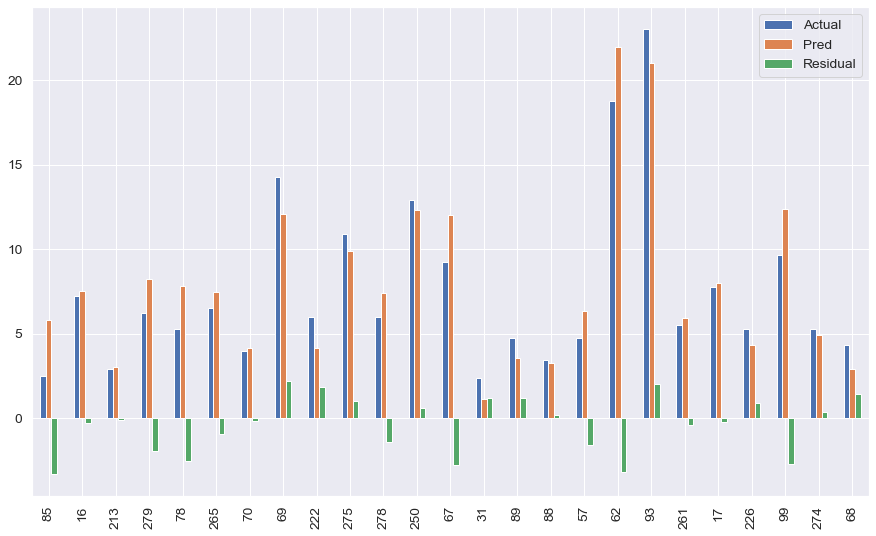

In [171]:
result_sample.plot.bar(figsize=(15,9))
plt.show()

# Model Evaluation

In [172]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [173]:
eval_metrics(y_test, y_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8480007806066974
MAE 		: 1.3785994560118475
MSE 		: 3.205629631678876
RMSE 		: 1.7904272204361942


In [174]:
y_train_pred = lin_model.predict(X_train)

In [175]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.95564081376503
MAE 		: 0.7048389642057707
MSE 		: 1.2426310649871786
RMSE 		: 1.1147336296116568


In [176]:
model_scores = {"model_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "model_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(model_scores)
ls


,model_train,model_test
rmse,1.114734,1.790427
mae,0.704839,1.378599
mse,1.242631,3.205630
R2,0.955641,0.848001


overfit durumunun söz konusu olduğu söylenebilir .

# Regularization

# Ridge

In [177]:
ridge_model = Ridge(alpha=1)

In [178]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [179]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8613745873571033
MAE 		: 1.3427411777233267
MSE 		: 2.9235790305075846
RMSE 		: 1.7098476629535113


In [180]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.950959458188203
MAE 		: 0.7541727643047694
MSE 		: 1.3737695812620812
RMSE 		: 1.1720791702193505


In [181]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.172079,1.709848
mae,0.754173,1.342741
mse,1.373770,2.923579
R2,0.950959,0.861375


# Ridge üzerine CV uygulayalım 

In [182]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [183]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.947878,-0.813020,-0.940143,-0.969610
2,0.938060,-0.699072,-0.747320,-0.864477
3,0.941023,-1.008647,-1.683373,-1.297449
4,0.860360,-0.677467,-0.822940,-0.907160
5,0.900040,-1.097326,-5.807927,-2.409964
6,0.856442,-1.401675,-4.423313,-2.103167
7,0.538412,-2.363105,-29.513963,-5.432675
8,0.931223,-0.800732,-0.893148,-0.945065
9,0.887095,-1.107190,-2.592517,-1.610129
10,0.694694,-0.827960,-1.087378,-1.042774


In [184]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.849523
test_neg_mean_absolute_error       -1.079619
test_neg_mean_squared_error        -4.851202
test_neg_root_mean_squared_error   -1.758247
dtype: float64

In [185]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8613745873571033
MAE 		: 1.3427411777233267
MSE 		: 2.9235790305075846
RMSE 		: 1.7098476629535113


In [186]:
alpha_space = np.linspace(0.01, 1, 100)  # bu aralığı azaltıp arttırabilirsin. 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [187]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [188]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [189]:
ridge_cv_model.alpha_

0.01

In [190]:
y_pred = ridge_cv_model.predict(X_test)

In [191]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8485792932018863
MAE 		: 1.3787531845297913
MSE 		: 3.193428930090808
RMSE 		: 1.7870167682735403


In [192]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9555977615344778
MAE 		: 0.7036049428919052
MSE 		: 1.2438370843856794
RMSE 		: 1.115274443527547


In [193]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.115274,1.787017
mae,0.703605,1.378753
mse,1.243837,3.193429
R2,0.955598,0.848579


# Lasso

In [194]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [195]:
y_train_pred = lasso_model.predict(X_train)

In [196]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8484230168207165
MAE 		: 1.2544669919772433
MSE 		: 4.246116397129256
RMSE 		: 2.0606106854836157


In [197]:
y_pred = lasso_model.predict(X_test)

In [198]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7997273353907876
MAE 		: 1.4252263790398658
MSE 		: 4.223705823287042
RMSE 		: 2.0551656437589263


In [199]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.060611,2.055166
mae,1.254467,1.425226
mse,4.246116,4.223706
R2,0.848423,0.799727


In [200]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,1.114734,1.790427,1.172079,1.709848,1.115274,1.787017,2.060611,2.055166
mae,0.704839,1.378599,0.754173,1.342741,0.703605,1.378753,1.254467,1.425226
mse,1.242631,3.205630,1.373770,2.923579,1.243837,3.193429,4.246116,4.223706
R2,0.955641,0.848001,0.950959,0.861375,0.955598,0.848579,0.848423,0.799727


# LASSO CV

In [201]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [202]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.853599,-1.025030,-2.640678,-1.625016
2,0.771601,-1.163473,-2.755705,-1.660032
3,0.904874,-1.221619,-2.715162,-1.647775
4,0.932668,-0.504798,-0.396806,-0.629925
5,0.792117,-1.683254,-12.078540,-3.475419
6,0.808912,-1.465831,-5.887797,-2.426478
7,0.415261,-3.241854,-37.388269,-6.114595
8,0.816814,-1.070266,-2.378891,-1.542366
9,0.901777,-1.270571,-2.255377,-1.501791
10,0.092369,-1.340451,-3.232619,-1.797949


In [203]:
lasso_model.coef_

array([ 3.94201105e-01,  5.00730328e-01, -3.17597427e-05, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

In [204]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 

In [205]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [206]:
lasso_cv_model.alpha_

0.01

In [207]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9499451413732223
MAE 		: 0.7791031729566965
MSE 		: 1.4021835737406072
RMSE 		: 1.1841383254251199


In [208]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8547654754044929
MAE 		: 1.335732056489173
MSE 		: 3.0629637273431034
RMSE 		: 1.7501324885113994


In [209]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.184138,1.750132
mae,0.779103,1.335732
mse,1.402184,3.062964
R2,0.949945,0.854765


In [210]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.114734,1.790427,1.172079,1.709848,1.115274,1.787017,2.060611,2.055166,1.184138,1.750132
mae,0.704839,1.378599,0.754173,1.342741,0.703605,1.378753,1.254467,1.425226,0.779103,1.335732
mse,1.242631,3.205630,1.373770,2.923579,1.243837,3.193429,4.246116,4.223706,1.402184,3.062964
R2,0.955641,0.848001,0.950959,0.861375,0.955598,0.848579,0.848423,0.799727,0.949945,0.854765


## Elastic-Net 

In [211]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [212]:
elastic_model.l1_ratio

0.5

In [213]:
elastic_model.alpha

1.0

In [214]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8523901794467856
MAE 		: 1.2352071665064297
MSE 		: 4.134984522597182
RMSE 		: 2.033466135099668


In [215]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8060763462742823
MAE 		: 1.3876524697191732
MSE 		: 4.0898065999803785
RMSE 		: 2.022327025972896


In [216]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,2.033466,2.022327
mae,1.235207,1.387652
mse,4.134985,4.089807
R2,0.852390,0.806076


In [217]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.114734,1.790427,1.172079,1.709848,1.115274,1.787017,2.060611,2.055166,1.184138,1.750132,2.033466,2.022327
mae,0.704839,1.378599,0.754173,1.342741,0.703605,1.378753,1.254467,1.425226,0.779103,1.335732,1.235207,1.387652
mse,1.242631,3.205630,1.373770,2.923579,1.243837,3.193429,4.246116,4.223706,1.402184,3.062964,4.134985,4.089807
R2,0.955641,0.848001,0.950959,0.861375,0.955598,0.848579,0.848423,0.799727,0.949945,0.854765,0.852390,0.806076


In [219]:
elastic_model.coef_.round()

array([ 0.,  1., -0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.])

# Elastic CV

In [220]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [221]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [222]:
elastic_cv_model.alpha_

0.01

In [223]:
elastic_cv_model.l1_ratio_

0.7

In [225]:
elastic_cv_model.coef_.round()

array([ 1.,  0., -0.,  0., -0., -0., -0.,  1., -0.,  2.,  1., -1., -0.,
        0.,  1., -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  1., -0.,
       -0., -0.,  0.,  0., -1., -0., -0.,  0.,  4.,  4., -2.,  1., -0.,
       -0., -1.])

In [226]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9496677252126086
MAE 		: 0.7763546993313023
MSE 		: 1.4099548150181638
RMSE 		: 1.1874151822417311


In [227]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8619331845917886
MAE 		: 1.3347903693883958
MSE 		: 2.9117983394301654
RMSE 		: 1.7063992321347796


In [228]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.187415,1.706399
mae,0.776355,1.334790
mse,1.409955,2.911798
R2,0.949668,0.861933


In [229]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.114734,1.790427,1.172079,1.709848,1.115274,1.787017,2.060611,2.055166,1.184138,1.750132,2.033466,2.022327,1.187415,1.706399
mae,0.704839,1.378599,0.754173,1.342741,0.703605,1.378753,1.254467,1.425226,0.779103,1.335732,1.235207,1.387652,0.776355,1.334790
mse,1.242631,3.205630,1.373770,2.923579,1.243837,3.193429,4.246116,4.223706,1.402184,3.062964,4.134985,4.089807,1.409955,2.911798
R2,0.955641,0.848001,0.950959,0.861375,0.955598,0.848579,0.848423,0.799727,0.949945,0.854765,0.852390,0.806076,0.949668,0.861933


# yüzde 70 lasso yüzde 30 ridge... Elastic model. Best Score : 0.861933